In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 심부전증 데이터

- 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
- 데이터 소개
    - Heart Failure Prediction 데이터셋을 사용합니다.
- 컬럼 정보
    - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [2]:
# 데이터 불러오기
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# 통계량 확인
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [20]:
# 사망여부 상관계수 확인
df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

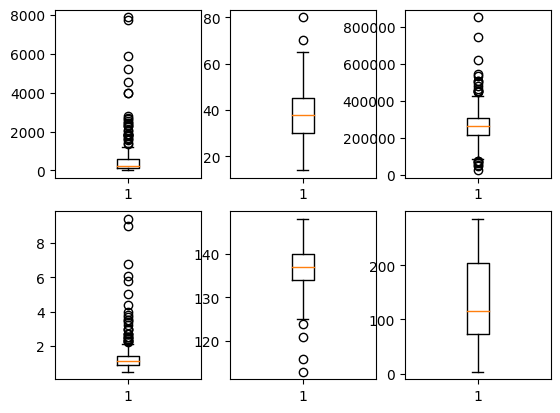

In [10]:
# boxplot 확인
fig, ax = plt.subplots(2, 3)

ax[0, 0].boxplot(data=df, x='creatinine_phosphokinase')
ax[0, 1].boxplot(data=df, x='ejection_fraction')
ax[0, 2].boxplot(data=df, x='platelets')
ax[1, 0].boxplot(data=df, x='serum_creatinine')
ax[1, 1].boxplot(data=df, x='serum_sodium')
ax[1, 2].boxplot(data=df, x='time')
plt.show()

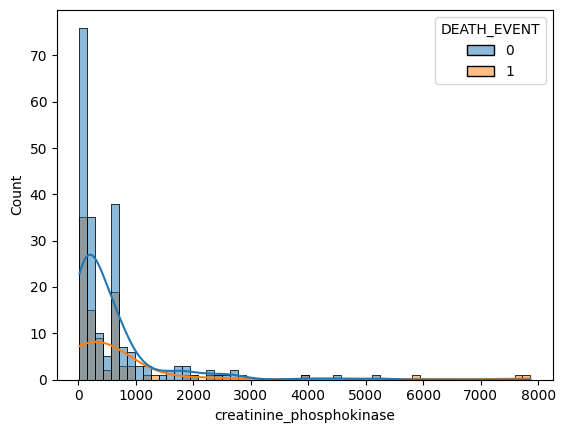

In [14]:
# 그래프 확인
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', kde=True)
plt.show()

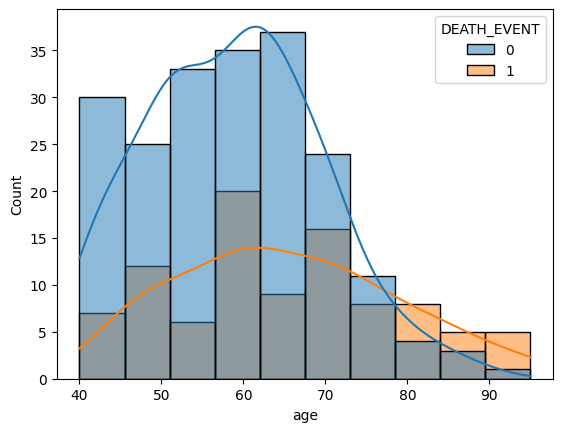

In [15]:
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True)
plt.show()

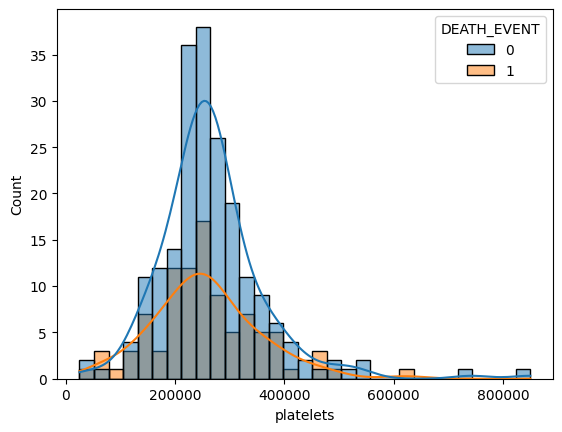

In [16]:
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', kde=True)
plt.show()

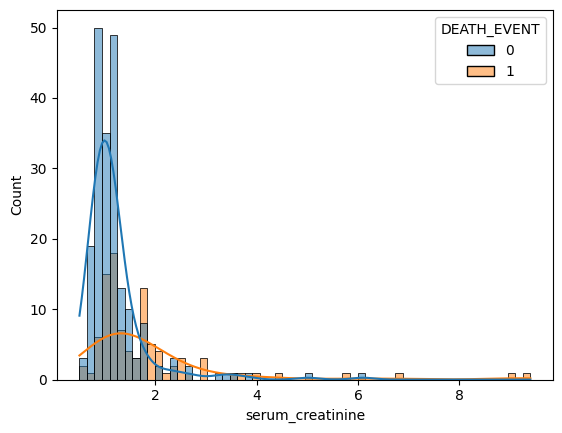

In [17]:
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True)
plt.show()

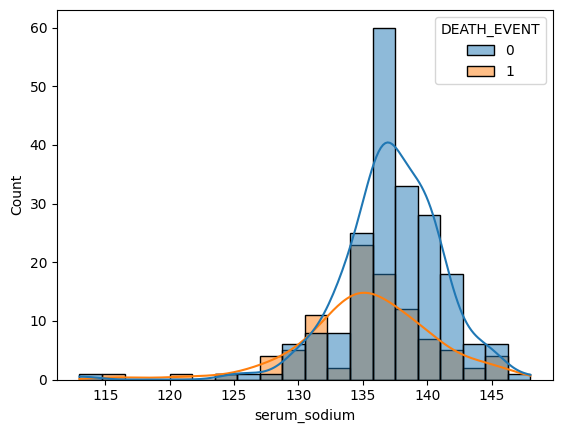

In [18]:
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', kde=True)
plt.show()

In [21]:
# 이상치 존재 > RobustScaler로 scaling 진행
from sklearn.preprocessing import RobustScaler
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = RobustScaler()
df[columns] = scaler.fit_transform(df[columns])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0.713212,0,-1.2,1,0.032967,1.6,-1.166667,1,0,-0.853846,1
1,55.0,0,16.350161,0,0.0,0,0.014923,0.0,-0.166667,1,0,-0.838462,1
2,65.0,0,-0.223416,0,-1.2,0,-1.098901,0.4,-1.333333,1,1,-0.830769,1
3,50.0,1,-0.298604,0,-1.2,0,-0.571429,1.6,0.000000,1,0,-0.830769,1
4,65.0,1,-0.193340,1,-1.2,0,0.714286,3.2,-3.500000,0,0,-0.823077,1


In [23]:
# X, Y 데이터 분리
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
print(df.shape, X.shape, Y.shape)

(299, 13) (299, 12) (299,)


In [37]:
# train/test 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(239, 12) (239,) (60, 12) (60,)


In [38]:
# 모델학습 함수 생성
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def model_predict(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    print('혼동행렬')
    print(confusion_matrix(test_y, pred))
    print(f'정확도: {accuracy_score(test_y, pred)}')
    print(f'정밀도: {precision_score(test_y, pred)}')
    print(f'재현율: {recall_score(test_y, pred)}')
    print(f'F1 score: {f1_score(test_y, pred)}')
    print(classification_report(test_y, pred))

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
model_predict(lr, x_train, y_train, x_test, y_test)

혼동행렬
[[39  2]
 [ 6 13]]
정확도: 0.8666666666666667
정밀도: 0.8666666666666667
재현율: 0.6842105263157895
F1 score: 0.7647058823529413
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



In [42]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
model_predict(xgb, x_train, y_train, x_test, y_test)

혼동행렬
[[36  5]
 [ 6 13]]
정확도: 0.8166666666666667
정밀도: 0.7222222222222222
재현율: 0.6842105263157895
F1 score: 0.7027027027027027
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



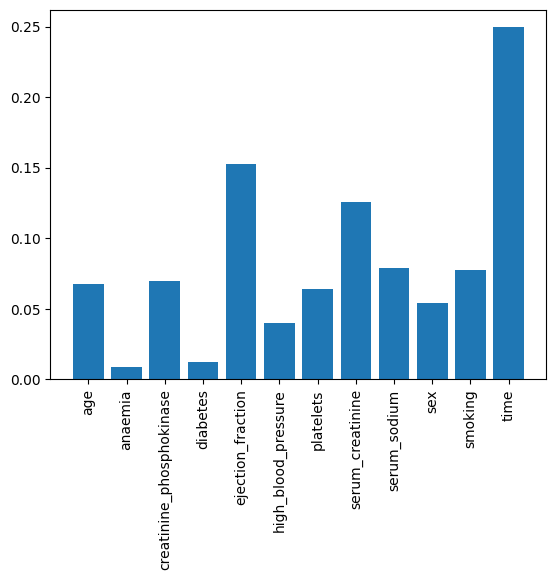

In [51]:
# Feature의 중요도 확인
plt.bar(X.columns, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [41]:
# RandomForestClassfier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
model_predict(rfc, x_train, y_train, x_test, y_test)

혼동행렬
[[35  6]
 [ 5 14]]
정확도: 0.8166666666666667
정밀도: 0.7
재현율: 0.7368421052631579
F1 score: 0.717948717948718
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



In [43]:
# DicisionTree
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(random_state=0)
model_predict(dct, x_train, y_train, x_test, y_test)

혼동행렬
[[34  7]
 [ 4 15]]
정확도: 0.8166666666666667
정밀도: 0.6818181818181818
재현율: 0.7894736842105263
F1 score: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.68      0.79      0.73        19

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60



In [44]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
model_predict(knc, x_train, y_train, x_test, y_test)

혼동행렬
[[36  5]
 [10  9]]
정확도: 0.75
정밀도: 0.6428571428571429
재현율: 0.47368421052631576
F1 score: 0.5454545454545454
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.64      0.47      0.55        19

    accuracy                           0.75        60
   macro avg       0.71      0.68      0.69        60
weighted avg       0.74      0.75      0.74        60



In [45]:
# 파라미터 조정
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 200, 500],
    'max_features':[0.5, 0.7]
}

gs_rfc = GridSearchCV(rfc, params, cv=3, n_jobs=-1)
model_predict(gs_rfc, x_train, y_train, x_test, y_test)

혼동행렬
[[35  6]
 [ 3 16]]
정확도: 0.85
정밀도: 0.7272727272727273
재현율: 0.8421052631578947
F1 score: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.73      0.84      0.78        19

    accuracy                           0.85        60
   macro avg       0.82      0.85      0.83        60
weighted avg       0.86      0.85      0.85        60



In [46]:
gs_rfc.best_params_

{'max_features': 0.5, 'n_estimators': 200}

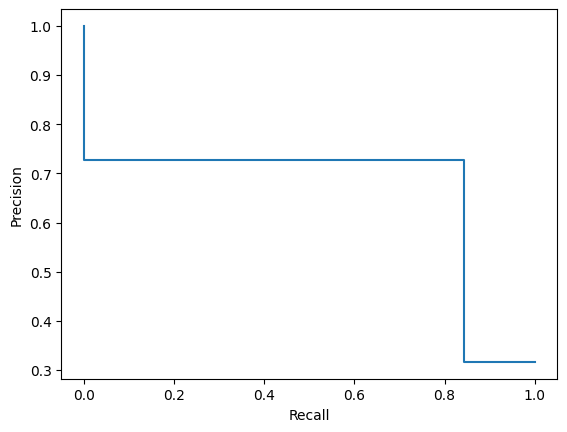

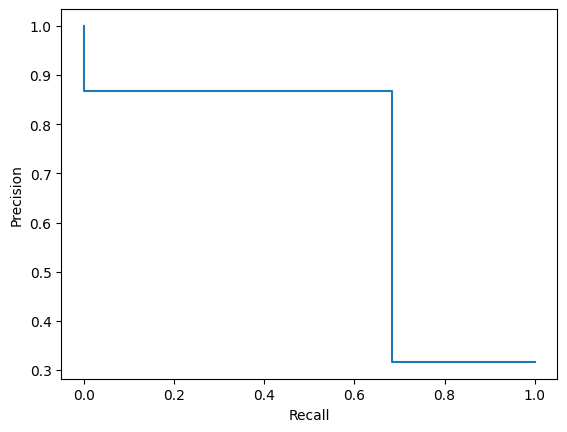

In [50]:
# precision-recall 커브 확인
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

pred = gs_rfc.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

pred = lr.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()